### OIL Factor

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

price = pd.read_parquet(
    '../Data/US_stock_Price.parquet',
).resample('W-FRI').last()

In [37]:
oil_price = pd.read_excel(
    '../Data/WTI.xlsx',
    index_col = 0
).resample('W-FRI').last()

In [38]:
oil_ret = oil_price.pct_change()

In [39]:
oil_ret.loc['1990':].index

DatetimeIndex(['1990-01-05', '1990-01-12', '1990-01-19', '1990-01-26',
               '1990-02-02', '1990-02-09', '1990-02-16', '1990-02-23',
               '1990-03-02', '1990-03-09',
               ...
               '2024-08-30', '2024-09-06', '2024-09-13', '2024-09-20',
               '2024-09-27', '2024-10-04', '2024-10-11', '2024-10-18',
               '2024-10-25', '2024-11-01'],
              dtype='datetime64[ns]', name='Date', length=1818, freq='W-FRI')

In [40]:
price_ret = price.pct_change()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_26562/1882691314.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_ret = price.pct_change()


In [41]:
price_ret.index

DatetimeIndex(['1990-01-05', '1990-01-12', '1990-01-19', '1990-01-26',
               '1990-02-02', '1990-02-09', '1990-02-16', '1990-02-23',
               '1990-03-02', '1990-03-09',
               ...
               '2024-08-30', '2024-09-06', '2024-09-13', '2024-09-20',
               '2024-09-27', '2024-10-04', '2024-10-11', '2024-10-18',
               '2024-10-25', '2024-11-01'],
              dtype='datetime64[ns]', name='Date', length=1818, freq='W-FRI')

In [42]:
oil_excess = price_ret - oil_ret.loc['1990':].values

In [44]:
price = pd.read_parquet(
    '../Data/US_stock_Price.parquet',
)
price_ret = price.pct_change()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_26562/2331620672.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_ret = price.pct_change()


In [45]:
from tqdm import tqdm
up_30per = dict()
down_30per = dict()

mean_excess = pd.DataFrame(
    index = price_ret.index,
    columns = ['Up 30per', 'Down 30per']
)

for i in tqdm(zip([f'{year}-06' for year in range(1990, 2025)], [f'{year}-05' for year in range(1991, 2026)])) :
    length = int(len(oil_excess.loc[i[0]:i[1]].mean().sort_values(ascending = False).dropna()) * 0.3)
    up_30per[i[0]] = oil_excess.loc[i[0]:i[1]].mean().sort_values(ascending = False).dropna().iloc[:length].index.tolist()
    down_30per[i[0]] = oil_excess.loc[i[0]:i[1]].mean().sort_values(ascending = True).dropna().iloc[:length].index.tolist()
    
    mean_excess.loc[i[0]:i[1], 'Up 30per'] = price_ret.loc[i[0]:i[1], up_30per[i[0]]].mean(axis = 1).values
    mean_excess.loc[i[0]:i[1], 'Down 30per'] = price_ret.loc[i[0]:i[1], down_30per[i[0]]].mean(axis = 1).values

35it [00:02, 16.12it/s]


In [46]:
oil_factor = mean_excess['Up 30per'] - mean_excess['Down 30per']

In [47]:
mean_excess

,Up 30per,Down 30per
Date,,
1990-01-02,NaN,NaN
1990-01-03,NaN,NaN
1990-01-04,NaN,NaN
1990-01-05,NaN,NaN
1990-01-08,NaN,NaN
...,...,...
2024-10-25,0.001494,-0.002282
2024-10-28,0.021044,0.010664
2024-10-29,0.001478,-0.009366


<Axes: xlabel='Date'>

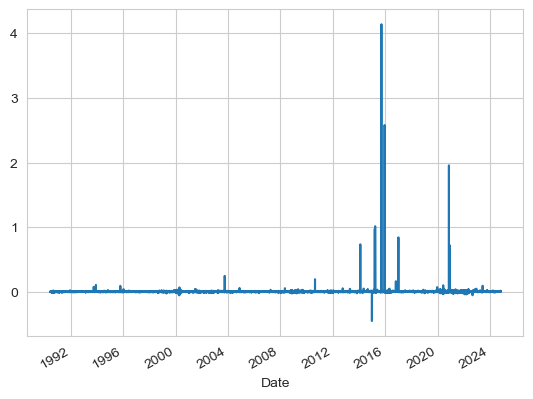

In [48]:
oil_factor.plot()

In [49]:
pd.DataFrame(oil_factor).to_parquet('../Data/OIL_Factor.parquet')